In [1]:
import pandas as pd

#data_frame = pd.read_csv('/content/test_data_3.csv', delimiter=';', encoding='windows-1251')
#data_frame['Потребление электроэнергии, yt'] = data_frame['Потребление электроэнергии, yt'].str.replace(',', '.').astype(float)
#data_frame

data = pd.read_csv('/content/data.csv', delimiter = ';')
data['Экспорт'] = data['Экспорт'].str.replace(',', '.').astype(float)
data.index_col = 'Область'
data

,Год,Область,Экспорт
0,2000,Курганская область,113.2
1,2000,Свердловская область,284.0
2,2000,Тюменская область,1197.9
3,2000,Челябинская область,213.0
4,2001,Курганская область,75.0
...,...,...,...
83,2020,Челябинская область,1972.7
84,2021,Курганская область,81.0
85,2021,Свердловская область,1671.2
86,2021,Тюменская область,518.8


In [2]:
unique_regions = data['Область'].unique()
region_wise_data = {region: data[data['Область'] == region] for region in unique_regions}
region_wise_data.keys(), region_wise_data[unique_regions[0]].head()

(dict_keys(['Курганская область', 'Свердловская область', 'Тюменская область', 'Челябинская область']),
      Год             Область  Экспорт
 0   2000  Курганская область    113.2
 4   2001  Курганская область     75.0
 8   2002  Курганская область     42.1
 12  2003  Курганская область     80.0
 16  2004  Курганская область     94.7)

In [3]:
data_frame = region_wise_data['Челябинская область']
data_frame

,Год,Область,Экспорт
3,2000,Челябинская область,213.00
7,2001,Челябинская область,271.80
11,2002,Челябинская область,259.50
15,2003,Челябинская область,436.30
19,2004,Челябинская область,660.00
23,2005,Челябинская область,941.50
27,2006,Челябинская область,1134.50
31,2007,Челябинская область,1828.40
35,2008,Челябинская область,2228.30
39,2009,Челябинская область,1114.80


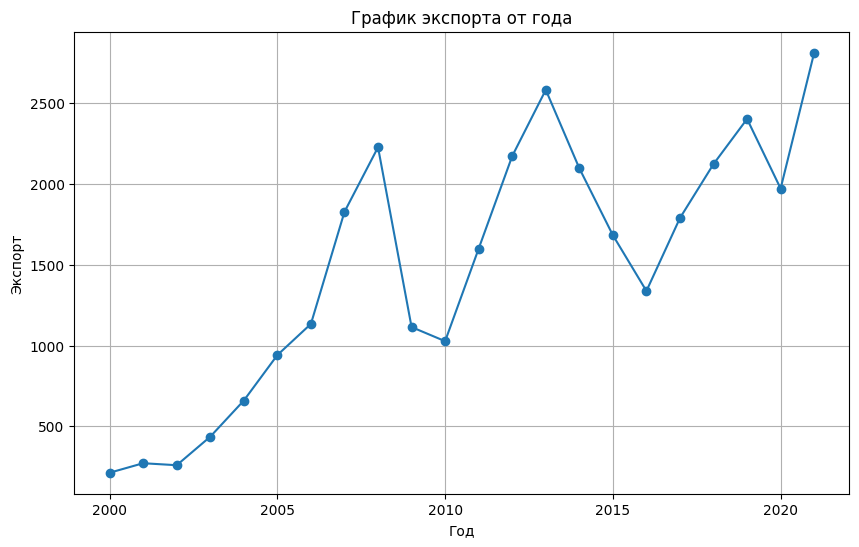

In [6]:
import matplotlib.pyplot as plt


# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data_frame['Год'], data_frame['Экспорт'], marker='o')
plt.title('График экспорта от года')
plt.xlabel('Год')
plt.ylabel('Экспорт')
plt.grid(True)
plt.show()

In [7]:
from statsmodels.tsa.stattools import acf

# Computing the autocorrelation coefficients
autocorrelation_coefficients = acf(data_frame['Экспорт'], nlags=8)
autocorrelation_coefficients

array([1.        , 0.69474763, 0.44287651, 0.24116143, 0.19223583,
       0.18988613, 0.18443888, 0.08026697, 0.00121006])

<Figure size 1000x600 with 0 Axes>

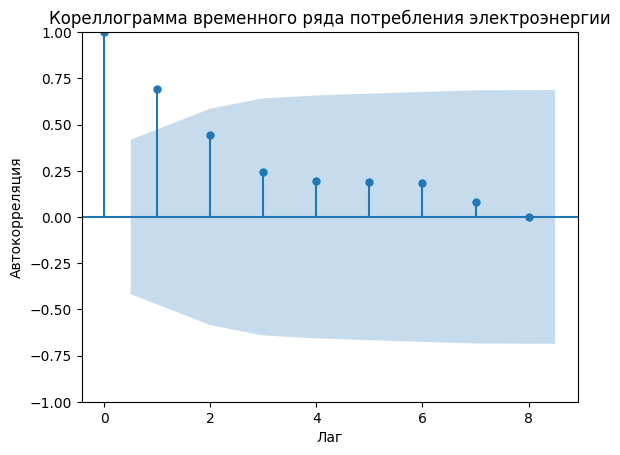

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(data_frame['Экспорт'], lags=8)
plt.title('Кореллограмма временного ряда потребления электроэнергии')
plt.xlabel('Лаг')
plt.ylabel('Автокорреляция')
plt.show()